## Przygotowanie danych

In [31]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as stats
from scipy.stats import pearsonr, chi2_contingency
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
monsters = pd.read_csv("monsters.csv")
monsters.head(10)

,name,size,race,aligment,hp,armor,speed,challenge_rating,xp
0,Aboleth,Large,Aberration,Lawful Evil,135,17,10,10.00,5900
1,Acolyte,Medium,Humanoid,Any Alignment,9,10,30,0.25,50
2,Adult Black Dragon,Huge,Dragon,Chaotic Evil,195,19,40,14.00,11500
3,Adult Blue Dragon,Huge,Dragon,Lawful Evil,225,19,40,16.00,15000
4,Adult Brass Dragon,Huge,Dragon,Chaotic Good,172,18,40,13.00,10000
5,Adult Bronze Dragon,Huge,Dragon,Lawful Good,212,19,40,15.00,13000
6,Adult Copper Dragon,Huge,Dragon,Chaotic Good,184,18,40,14.00,11500
7,Adult Gold Dragon,Huge,Dragon,Lawful Good,256,19,40,17.00,18000
8,Adult Green Dragon,Huge,Dragon,Lawful Evil,207,19,40,15.00,13000
9,Adult Red Dragon,Huge,Dragon,Chaotic Evil,256,19,40,17.00,18000


In [4]:
monsters.count()

name                317
size                317
race                317
aligment            317
hp                  317
armor               317
speed               317
challenge_rating    317
xp                  317
dtype: int64

In [5]:
monsters_data=monsters.dropna()
monsters_data.count()

name                317
size                317
race                317
aligment            317
hp                  317
armor               317
speed               317
challenge_rating    317
xp                  317
dtype: int64

In [6]:
monsters = pd.DataFrame(monsters_data)
monsters

,name,size,race,aligment,hp,armor,speed,challenge_rating,xp
0,Aboleth,Large,Aberration,Lawful Evil,135,17,10,10.00,5900
1,Acolyte,Medium,Humanoid,Any Alignment,9,10,30,0.25,50
2,Adult Black Dragon,Huge,Dragon,Chaotic Evil,195,19,40,14.00,11500
3,Adult Blue Dragon,Huge,Dragon,Lawful Evil,225,19,40,16.00,15000
4,Adult Brass Dragon,Huge,Dragon,Chaotic Good,172,18,40,13.00,10000
...,...,...,...,...,...,...,...,...,...
312,Young Green Dragon,Large,Dragon,Lawful Evil,136,18,40,8.00,3900
313,Young Red Dragon,Large,Dragon,Chaotic Evil,178,18,40,10.00,5900
314,Young Silver Dragon,Large,Dragon,Lawful Good,168,18,40,9.00,5000
315,Young White Dragon,Large,Dragon,Chaotic Evil,133,17,40,6.00,2300


## Analiza

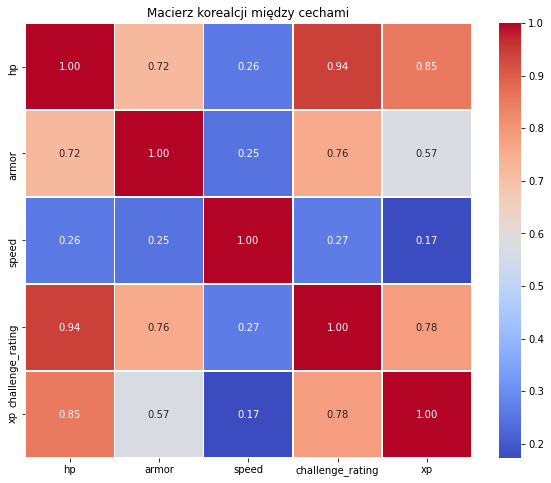

In [10]:
correlation_matrix = monsters.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Macierz korealcji między cechami')
plt.show()

## Pearson

In [39]:
x= monsters_data["challenge_rating"]
y= monsters_data["hp"]

korelacja, p_wartosc = pearsonr(x, y)

print(f"Współczynnik korelacji Pearsona: {korelacja}")
print(f"P-wartość: {p_wartosc}")

Współczynnik korelacji Pearsona: 0.9433767339484098
P-wartość: 5.272448400777431e-153


Mean Absolute Error: 3838.3491626919613
Mean Squared Error: 22711656.029414818
Root Mean Squared Error: 4765.674771678699


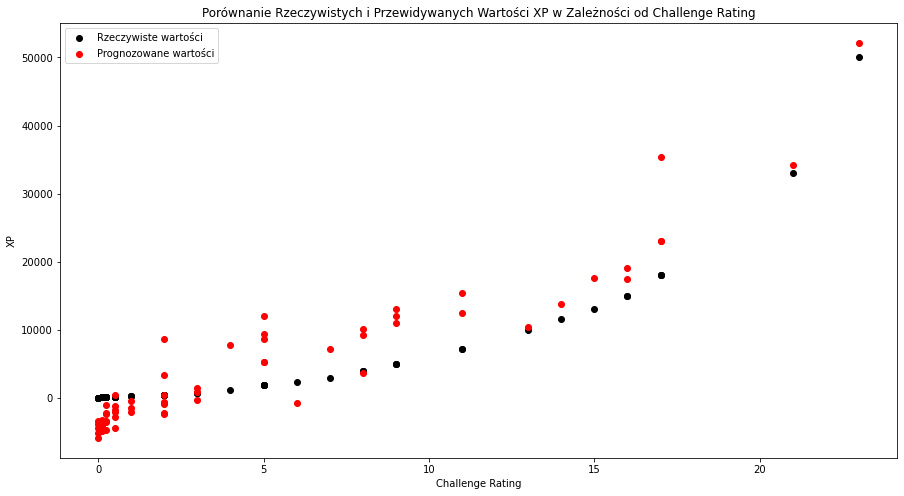

In [19]:
x = monsters[['hp', 'armor', 'speed', 'challenge_rating']]
y = monsters['xp']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

plt.figure(figsize=(15,8))
plt.scatter(X_test['challenge_rating'], y_test, color='black', label='Rzeczywiste wartości')
plt.scatter(X_test['challenge_rating'], y_pred, color='red', label='Prognozowane wartości')
plt.title('Porównanie Rzeczywistych i Przewidywanych Wartości XP w Zależności od Challenge Rating')
plt.xlabel('Challenge Rating')
plt.ylabel('XP')
plt.legend()
plt.show()

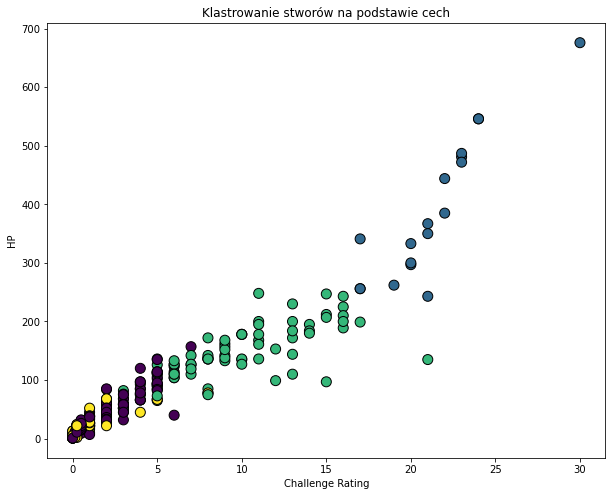

In [30]:
x = monsters[['hp', 'armor', 'speed', 'challenge_rating']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_scaled)
monsters['cluster'] = kmeans.labels_

plt.figure(figsize=(10,8))
plt.scatter(monsters['challenge_rating'], monsters['hp'], c=monsters['cluster'], cmap='viridis', edgecolors='k', s=100)
plt.xlabel('Challenge Rating')
plt.ylabel('HP')
plt.title('Klastrowanie stworów na podstawie cech')
plt.show()

### T-Student

In [18]:
group1= monsters_data["armor"]
group2= monsters_data["hp"]

statystyka_t, p_wartosc = stats.ttest_ind(group1, group2)

print(f"Statystyka t: {statystyka_t}")
print(f"P-wartość: {p_wartosc}")

alfa = 0.05
if p_wartosc < alfa:
    print("Różnica między grupami jest statystycznie istotna.")
else:
    print("Brak statystycznej istotności różnicy między grupami.")

Statystyka t: -12.04506499366261
P-wartość: 3.174617094498107e-30
Różnica między grupami jest statystycznie istotna.


### Test chi-kwadrat

In [26]:
tablica_kontyngencji = pd.crosstab(monsters_data['hp'], monsters_data['armor'])

statystyka_chi2, p_wartosc, _, _ = chi2_contingency(tablica_kontyngencji)

print(f"Statystyka chi-kwadrat: {statystyka_chi2}")
print(f"P-wartość: {p_wartosc}")

alfa = 0.05
if p_wartosc < alfa:
    print("Wyniki są statystycznie istotne, zmienne są zależne.")
else:
    print("Brak statystycznej istotności, zmienne są niezależne.")

Statystyka chi-kwadrat: 2703.1872549449113
P-wartość: 3.221236965716175e-29
Wyniki są statystycznie istotne, zmienne są zależne.


## Wizualizacja

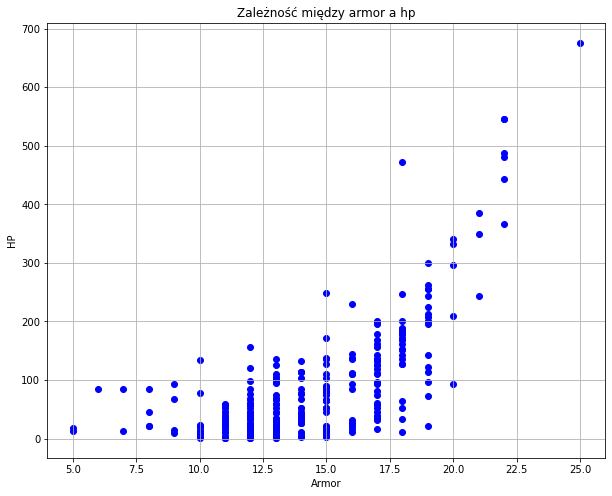

In [37]:
plt.figure(figsize=(10, 8))
plt.scatter(monsters_data['armor'], monsters_data['hp'], color='blue')
plt.title('Zależność między armor a hp')
plt.xlabel('Armor')
plt.ylabel('HP')
plt.grid(True)
plt.show()

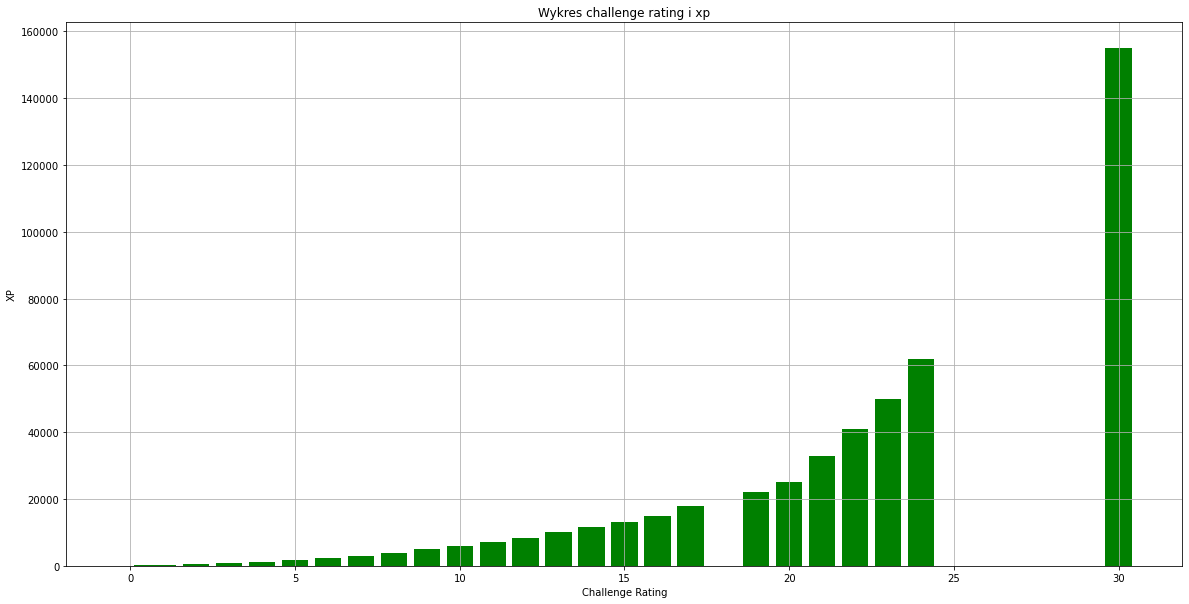

In [40]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(monsters_data['challenge_rating'], monsters_data['xp'], color='green')
ax.set_title('Wykres challenge rating i xp')
ax.set_xlabel('Challenge Rating')
ax.set_ylabel('XP')
ax.grid(True)
plt.show()

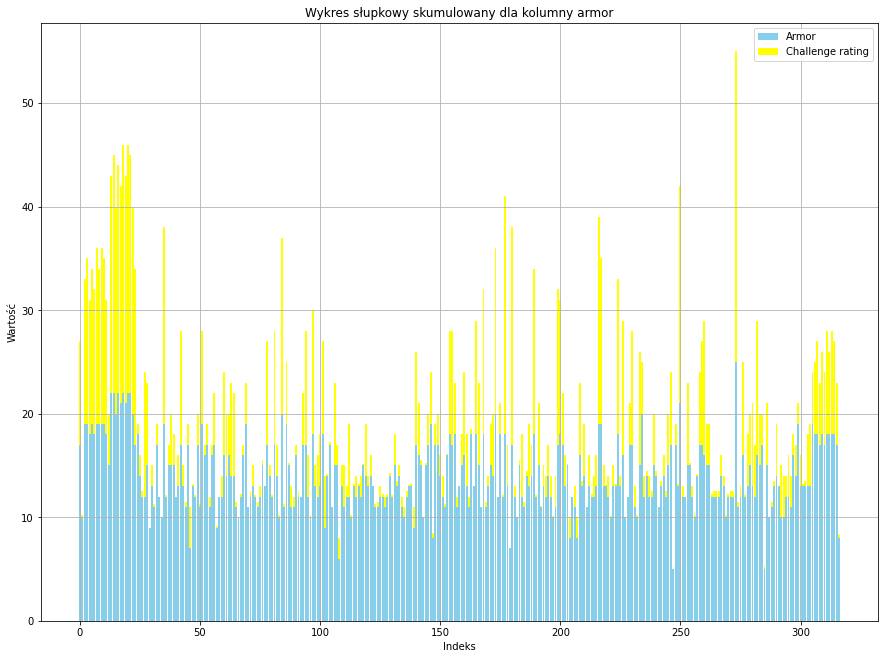

In [52]:
plt.figure(figsize=(15, 11))
plt.bar(monsters_data.index, monsters_data['armor'], label='Armor', color='skyblue')
plt.bar(monsters_data.index, monsters_data['challenge_rating'], bottom=monsters_data['armor'], label='Challenge rating', color='yellow')

plt.title('Wykres słupkowy skumulowany dla kolumny armor')
plt.xlabel('Indeks')
plt.ylabel('Wartość')
plt.legend()
plt.grid(True)
plt.show()